<a href="https://colab.research.google.com/github/HarshJain41/employee_promotion_prediction/blob/main/Employee_Promotion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>**Predict whether the Employee of an Organization should get Promotion or Not?**</center>

&nbsp;

Our client is a large MNC and they have 9 broad verticals across the organisation. One of the problem our client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

In [1]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

In [2]:
# reading the datasets

train = pd.read_csv('/content/drive/MyDrive/Machine Learning/Employee_Promotion_Prediction/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Machine Learning/Employee_Promotion_Prediction/test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


We have observations of 54,808 employees that we want to analyse. And there are 14 features in our dataset on the top of which we are going to build our model to predict if the employee should be promoted or not.

In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [7]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [9]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 13)
Shape of the Test Data : (23490, 12)


## Descriptive Statistics

* Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights
* First we will the Descriptive Statistics for the Numerical Columns
* for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 50 percentile, and 75 percentile.
* Then we will check for the Descriptive Statistics for Categorical Columns
* for Categorical Columns we check for stats such as count, frequency, top, and unique elements.

In [10]:
# lets check descriptive statistics for numerical columns
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [11]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [12]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

<Axes: >

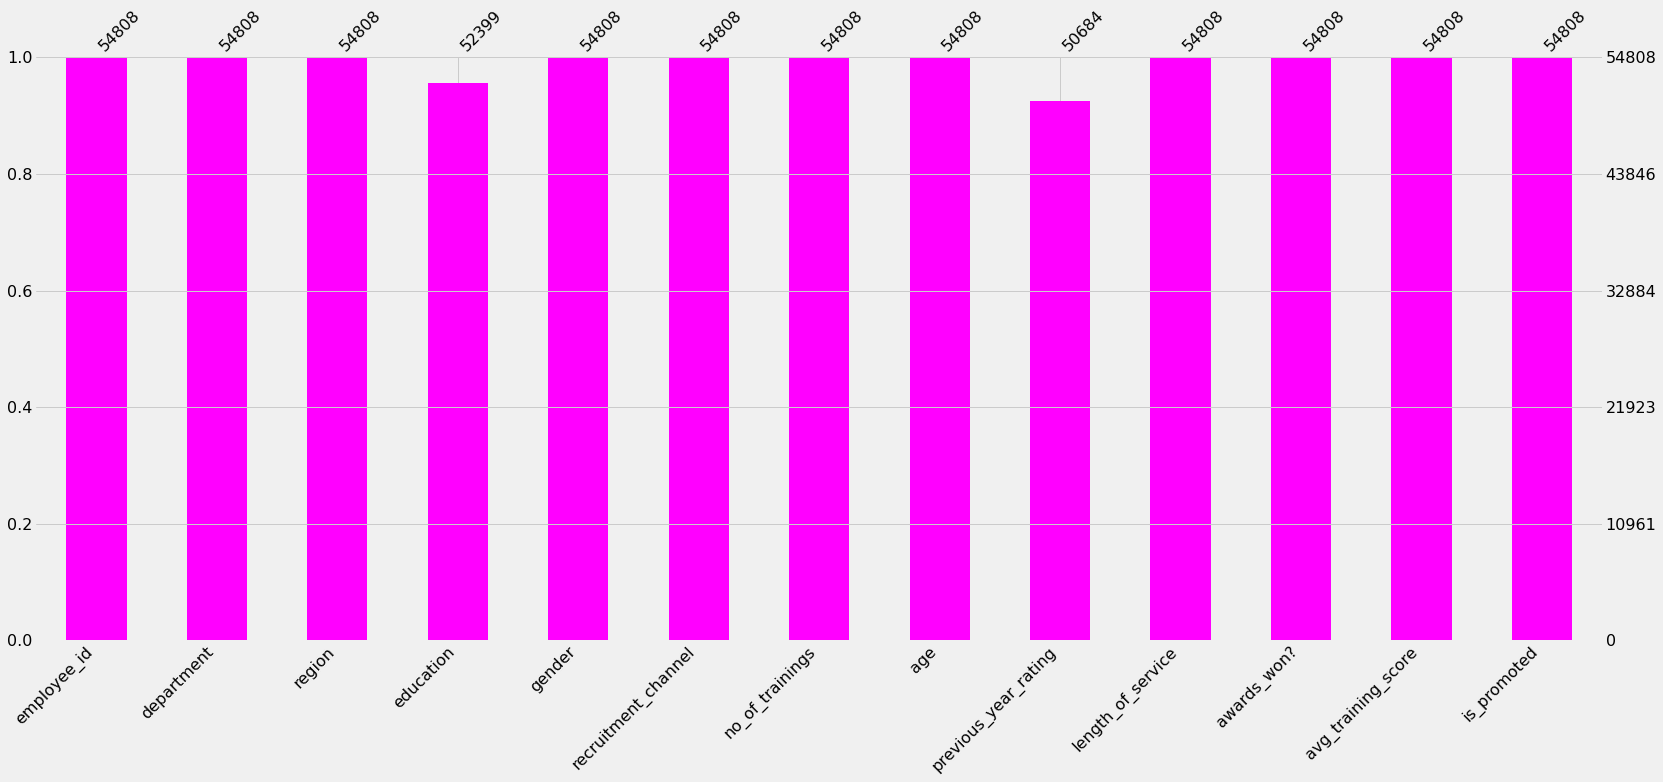

In [14]:
import missingno as msno
msno.bar(train, color='magenta')

<Axes: >

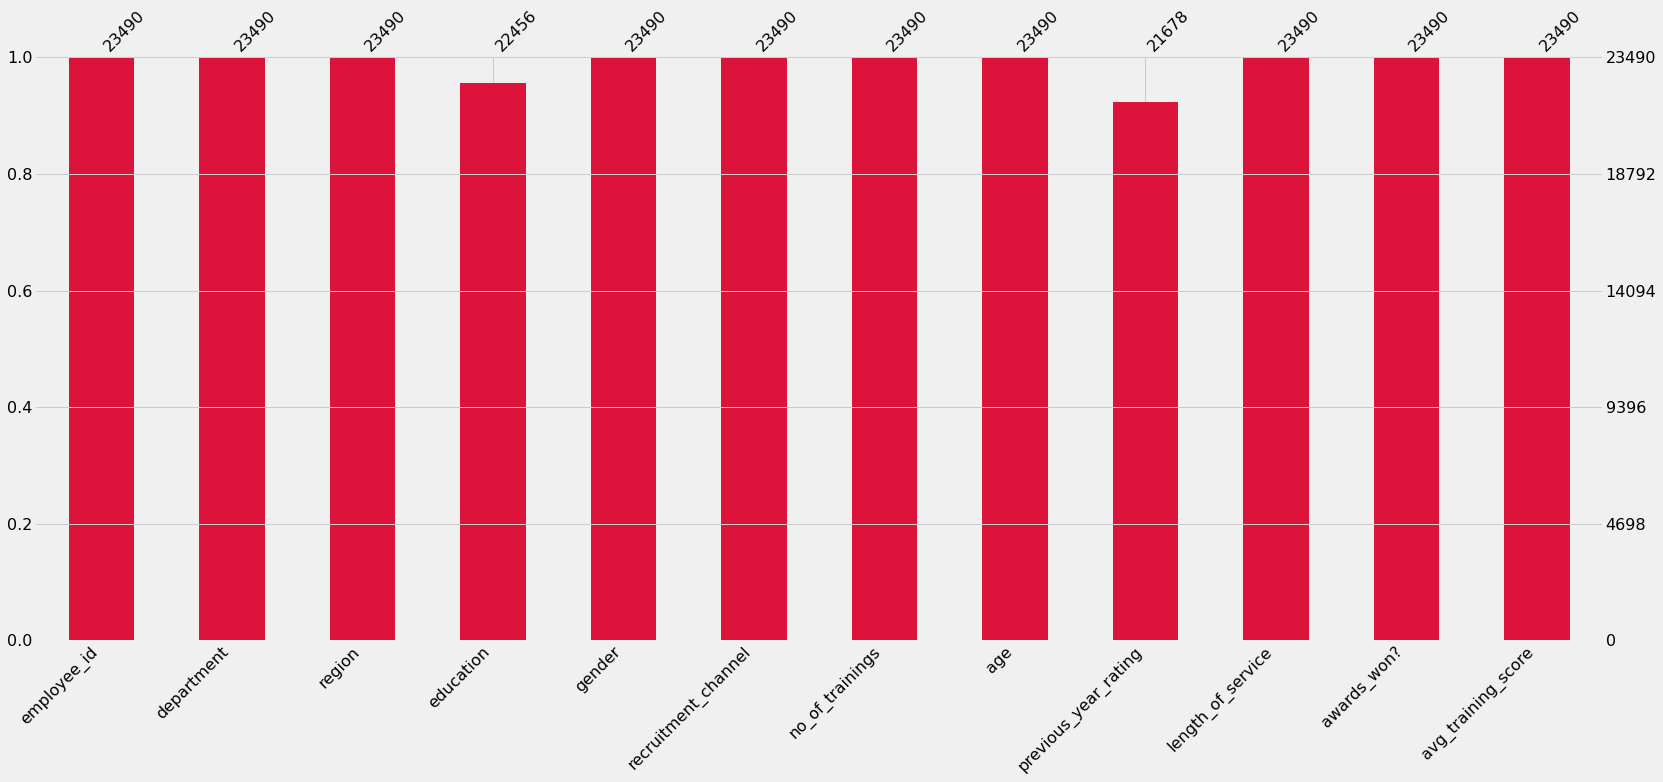

In [15]:
import missingno as msno
msno.bar(test, color='crimson')

## Treatment of Missing Values

* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can be cause due to varios reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

## Analysing Target Column

In [16]:
target = train['is_promoted'].value_counts()

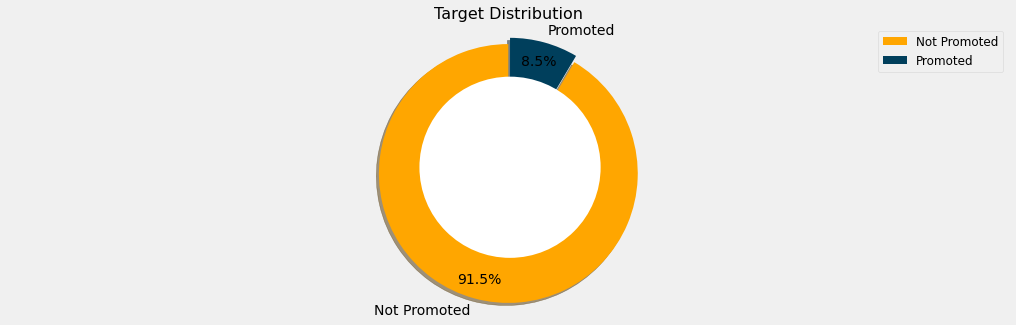

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels and sizes for the pie chart
labels = ['Not Promoted', 'Promoted']
sizes = [50140, 4668]

# Define the colors for each category
colors = ['#ffa600', '#003f5c']

# Create the pie chart with a shadow and explosion effect
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow=True, explode=(0.05, 0))

# Add a circle in the middle to create a donut chart effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title to the chart
ax1.set_title("Target Distribution", fontsize=16)

# Set the font size for the labels
plt.rcParams['font.size'] = 14

# Remove the unnecessary border lines
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Add a legend and adjust its position
plt.legend(labels, loc="best", fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Display the chart
plt.show()


## Treatment of missing values

In [18]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [19]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [20]:
train['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

## Outlier Detection

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset.

In [21]:
# Lets first analyze the Numberical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,0,49,0
1,65141,1,30,5.0,4,0,60,0
2,7513,1,34,3.0,7,0,50,0
3,2542,2,39,1.0,10,0,50,0
4,48945,1,45,3.0,2,0,73,0


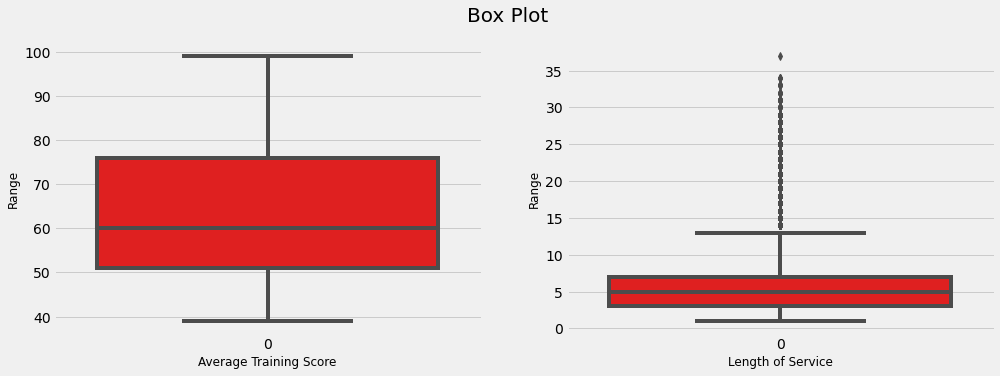

In [22]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

From the above box plots we can see that we have outliers in our Length of Service column. Let's handle this outliers in the next step

In [23]:
train['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [24]:
train['length_of_service'].value_counts().sort_values()

37       1
34       4
33       9
32      10
30      12
31      20
29      30
28      30
27      36
26      41
25      51
22      61
23      65
24      70
21      78
20     128
19     329
18     392
17     432
16     548
14     549
15     593
13     687
12     794
11     916
10    2193
9     2629
8     2883
1     4547
6     4734
7     5551
5     5832
2     6684
4     6836
3     7033
Name: length_of_service, dtype: int64

In [25]:
# lets remove the outliers from the length of service column

train = train[train['length_of_service'] <= 16]

In [26]:
train['education'].value_counts()

Bachelor's          38194
Master's & above    14010
Below Secondary       805
Name: education, dtype: int64

## Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

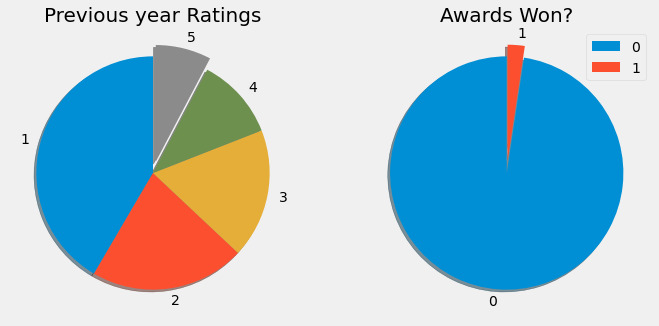

In [27]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')


# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
explode = [0,0.1]

plt.pie(sizes, labels = labels, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

In [28]:
train['no_of_trainings'].value_counts()

1     42806
2      7808
3      1744
4       459
5       124
6        42
7        11
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

<ipython-input-29-cbe564816bb7>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


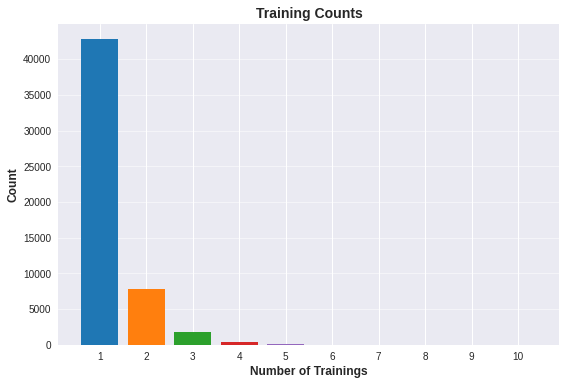

In [29]:
# Get the counts for each category
counts = train['no_of_trainings'].value_counts()

# Set the style of the plot
plt.style.use('seaborn')

# Create a bar chart with custom colors
plt.bar(counts.index, counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Add labels and title with custom fonts and sizes
plt.xlabel('Number of Trainings', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Training Counts', fontsize=14, fontweight='bold')

# Customize the tick labels
plt.xticks(counts.index, fontsize=10)
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines and set the alpha level
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()

In [30]:
train['age'].value_counts()

30    3665
31    3534
32    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1922
39    1694
40    1659
25    1299
41    1284
42    1130
43     956
24     845
44     796
45     671
46     555
47     443
23     428
48     394
50     350
49     308
51     275
53     265
52     247
22     231
54     222
55     218
56     177
57     165
60     143
58     137
59     133
20     113
21      98
Name: age, dtype: int64

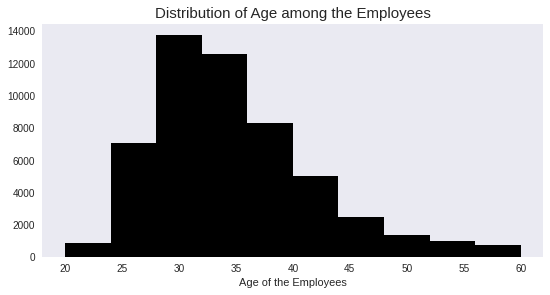

In [31]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

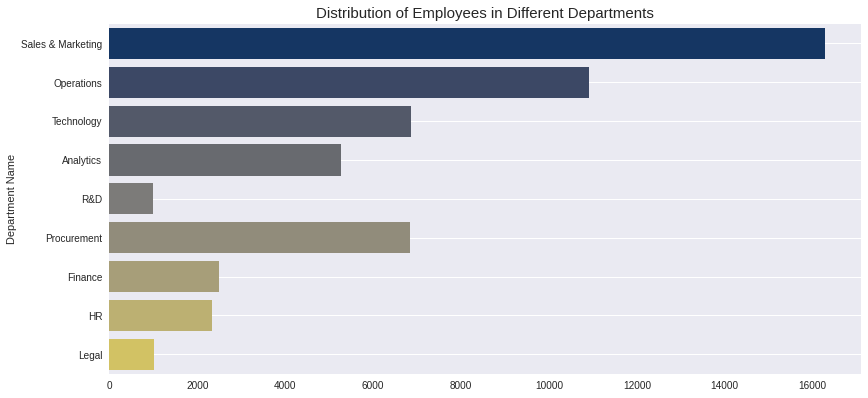

In [32]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

Company has maximum number of employees in the sales and marketing department

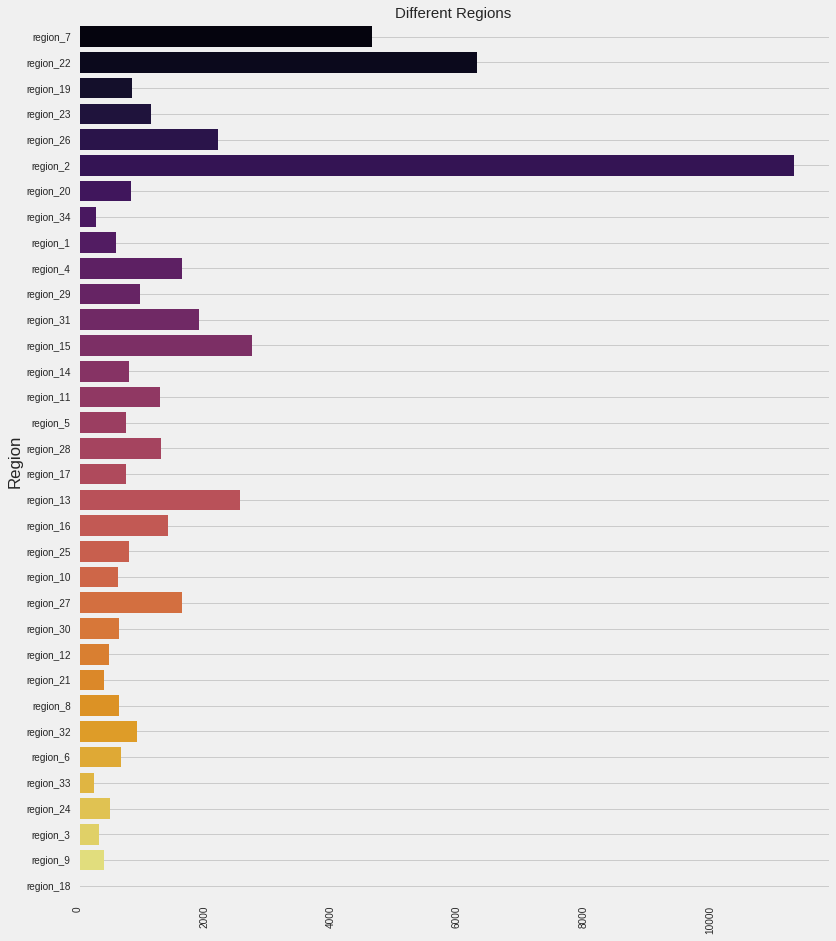

In [33]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

region 2 has the maximum number of employees working there

In [34]:
train['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

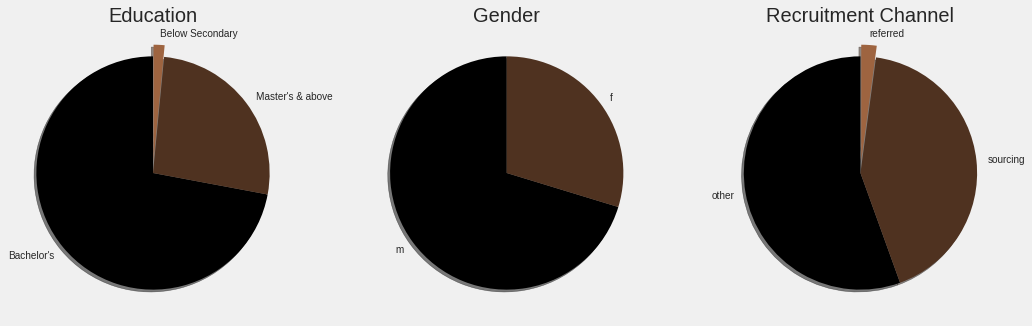

In [35]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

* Types of Bivariate Analysis
    * Categorical vs Categorical 
    * Categorical vs Numerical
    * Numerical vs Numerical
    
* First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

## For Gender vs Promotion

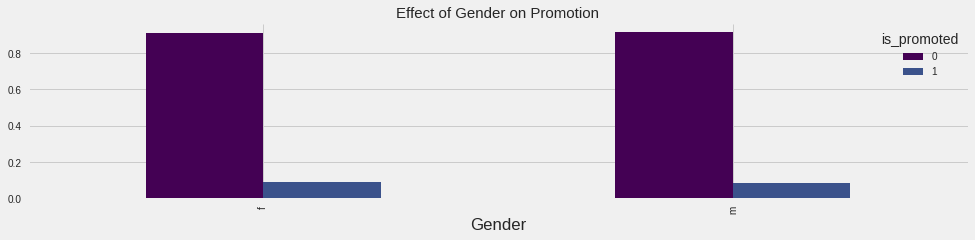

In [36]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.viridis(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors) #stacked parameter is set to False to create a horizontal bar chart with bars side by side
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel('Gender')
plt.show()

In [37]:
h = pd.crosstab(train['gender'], train['is_promoted'])
h

is_promoted,0,1
gender,,
f,14321,1428
m,34141,3119


In [38]:
h.div(x.sum(1).astype(float), axis = 0)   #This normalizes the contingency table by dividing each row by the sum of its values. 
                                          #This converts the frequency counts into proportions that can be easily compared across categories
                                          # i.e. 14321/(14321+1428) and 1428/(14321+1428)

is_promoted,0,1
gender,,
f,0.909328,0.090672
m,0.916291,0.083709


## Departments vs Promotion

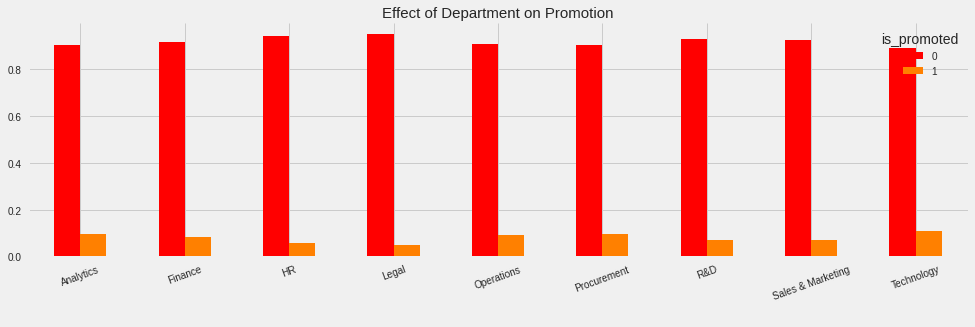

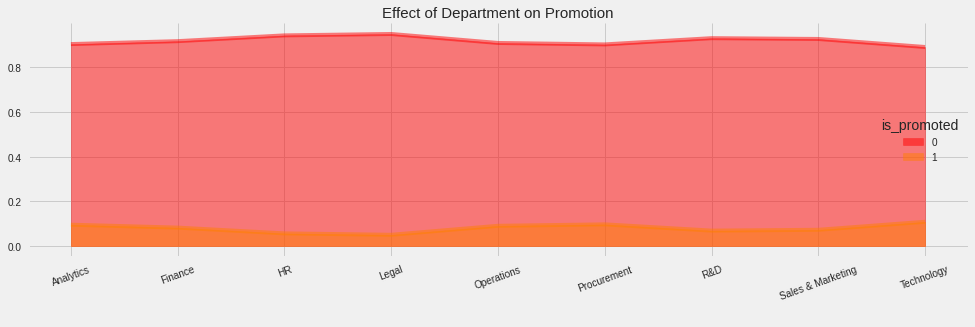

In [39]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.autumn(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.autumn(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, color = colors)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

## Age vs Promotion

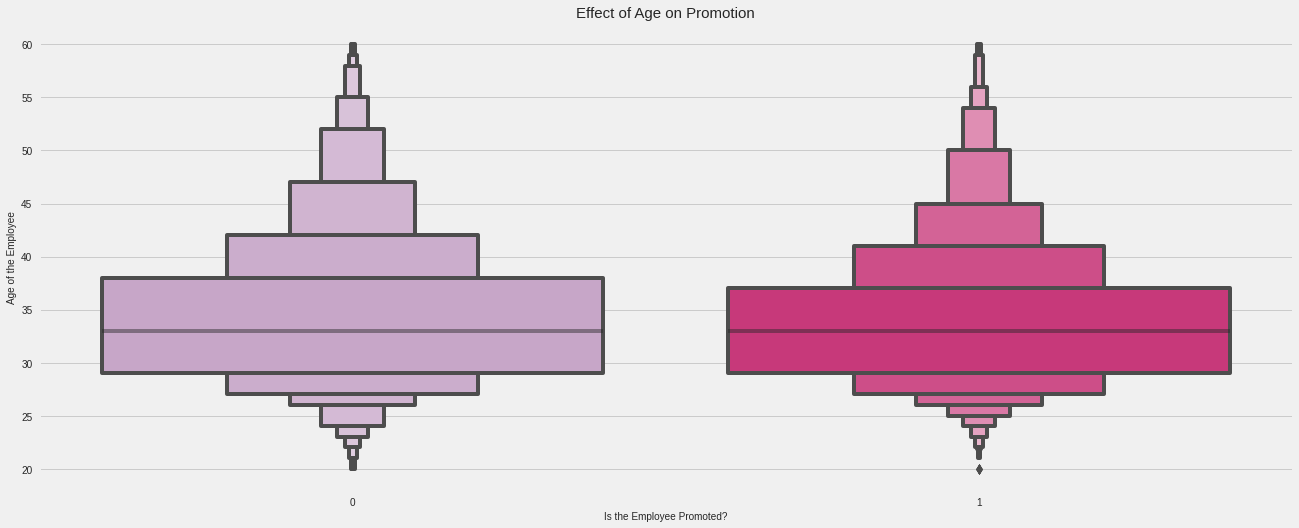

In [40]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (20, 8)
sns.boxenplot(x='is_promoted', y='age', data=train, palette='PuRd')
plt.title('Effect of Age on Promotion', fontsize=15)
plt.xlabel('Is the Employee Promoted?', fontsize=10)
plt.ylabel('Age of the Employee', fontsize=10)
plt.show()


## Department Vs Average Training Score

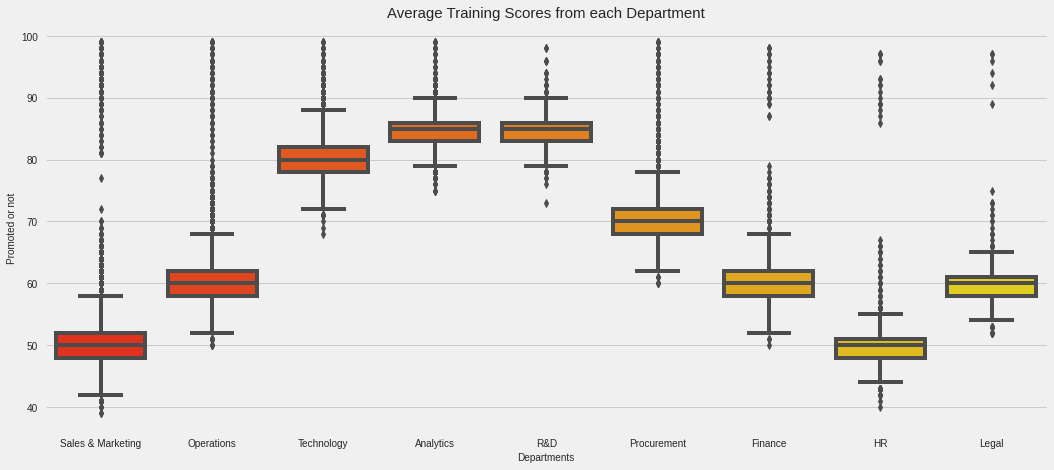

In [41]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(x = 'department', y = 'avg_training_score',data=train, palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Multivariate Analysis

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

* First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
* Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
* Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

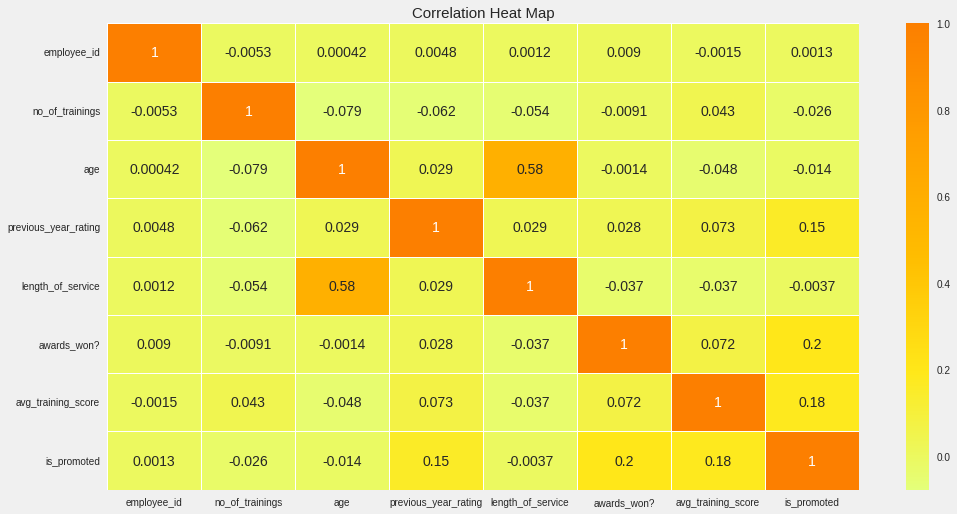

In [42]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

## Department vs Promotion vs Won awards?

In [43]:
train['awards_won?']

0        0
1        0
2        0
3        0
4        0
        ..
54802    0
54804    0
54805    0
54806    0
54807    0
Name: awards_won?, Length: 53009, dtype: int64

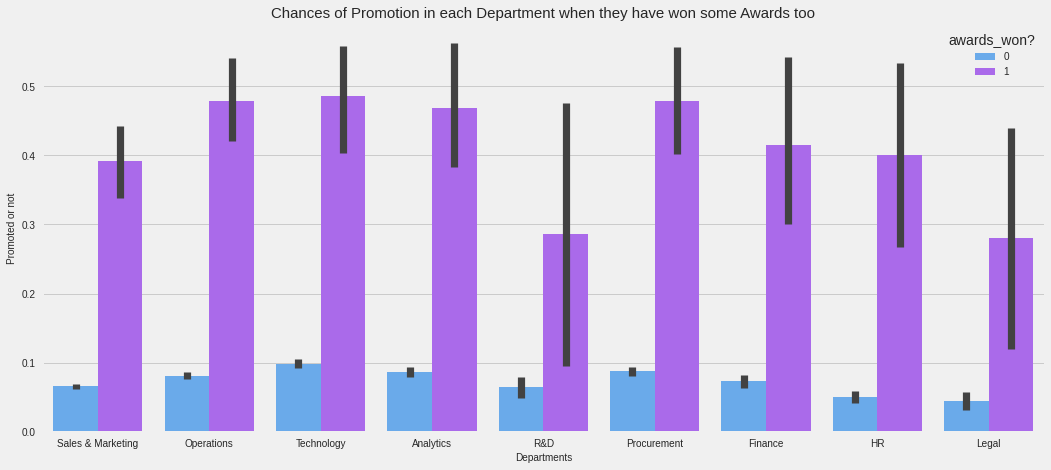

In [44]:
# lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(x = 'department', y = 'is_promoted',data=train, hue = train['awards_won?'], palette = 'cool')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## **Answering Some Key Questions**

### Does Older Employees getting more Promotion than Younger Employees?

In [45]:
train['age'].describe()

count    53009.000000
mean        34.254315
std          7.120853
min         20.000000
25%         29.000000
50%         33.000000
75%         38.000000
max         60.000000
Name: age, dtype: float64

In [46]:
old = train[(train['age']>30) & (train['is_promoted']==1)]
old

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,0,51,1
71,24040,Technology,region_22,Master's & above,m,other,1,34,5.0,7,0,78,1
75,54782,Sales & Marketing,region_2,Master's & above,m,sourcing,1,38,4.0,2,0,49,1
85,47498,Operations,region_11,Master's & above,f,sourcing,1,42,5.0,11,0,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54722,47608,Procurement,region_10,Master's & above,m,sourcing,1,34,5.0,2,0,72,1
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,3.0,1,0,56,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,81,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,65,1


In [47]:
young = train[(train['is_promoted']==1) & (train['age']<=30)]
young

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
66,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,3.0,1,0,61,1
69,45624,Analytics,region_31,Bachelor's,m,other,1,30,3.0,7,0,84,1
79,59147,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,30,3.0,3,0,58,1
84,44575,Legal,region_7,Bachelor's,m,other,1,29,3.0,1,0,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54624,57131,Finance,region_2,Bachelor's,m,other,1,24,3.0,1,0,71,1
54713,56396,Procurement,region_22,Bachelor's,m,sourcing,1,30,4.0,4,0,67,1
54720,38719,Analytics,region_4,Bachelor's,m,sourcing,1,29,2.0,3,0,88,1
54730,51059,Sales & Marketing,region_2,Bachelor's,m,other,1,29,5.0,4,0,58,1


In [48]:
train[train['is_promoted']==1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,0,51,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,3.0,1,0,61,1
69,45624,Analytics,region_31,Bachelor's,m,other,1,30,3.0,7,0,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,3.0,1,0,56,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,81,1
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.0,2,0,86,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,65,1


Out of the total 4547 employees which got promotion, older employees with age greater than 30 years got promoted more than the younger employees between the age 20 t0 30.

### What is the Probability to get Promoted, If an employeed has won an award?

In [49]:
award_won = train[train['awards_won?']==1]
award_won

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
66,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,58,1
122,38052,Procurement,region_34,Master's & above,m,sourcing,1,37,5.0,3,1,92,1
138,51164,Technology,region_14,Bachelor's,f,other,1,31,4.0,4,1,78,0
140,7606,Technology,region_29,Bachelor's,f,other,2,30,3.0,7,1,76,0
200,53630,Sales & Marketing,region_23,Master's & above,f,sourcing,1,34,4.0,5,1,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54641,2467,Sales & Marketing,region_27,Bachelor's,m,other,1,42,2.0,4,1,47,0
54702,4952,Operations,region_28,Bachelor's,m,other,1,28,3.0,2,1,62,0
54772,34501,Operations,region_27,Master's & above,m,other,1,37,5.0,2,1,57,0
54797,62450,Sales & Marketing,region_11,Bachelor's,m,sourcing,1,28,5.0,3,1,47,0


In [50]:
award_won[award_won['is_promoted']==1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
66,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,58,1
122,38052,Procurement,region_34,Master's & above,m,sourcing,1,37,5.0,3,1,92,1
200,53630,Sales & Marketing,region_23,Master's & above,f,sourcing,1,34,4.0,5,1,94,1
230,62923,Operations,region_13,Master's & above,f,other,1,38,5.0,2,1,93,1
317,22865,Analytics,region_20,Master's & above,m,other,1,40,5.0,5,1,83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54017,69878,Analytics,region_26,Master's & above,m,sourcing,1,41,5.0,5,1,90,1
54024,3752,HR,region_2,Master's & above,m,sourcing,1,60,5.0,8,1,50,1
54146,37302,Operations,region_2,Bachelor's,m,other,1,37,5.0,7,1,79,1
54503,10882,Sales & Marketing,region_25,Master's & above,m,sourcing,2,32,4.0,5,1,92,1


The Probability of getting promoted when award is won by the employee is = 552/1253 = 0.4405

That means there is 44% chances of getting promotion if an award was won by an employee.

### What is the Average Training Score of those Employees who got Promotion?

In [51]:
data = train

In [52]:
promoted_employees = data[data['is_promoted'] == 1]
avg_training_score_promoted_emp = promoted_employees['avg_training_score'].mean()
print("The Average Training Score for the Employees who got Promotion is {0:.0f}".format(avg_training_score_promoted_emp))

The Average Training Score for the Employees who got Promotion is 71


### What is the impact of gender on promotion?

In [53]:
# lets check the gender gap in total employees

data['gender'].value_counts()

m    37260
f    15749
Name: gender, dtype: int64

In [54]:
# lets check the Gender Gap in Promotion

promoted_employees['gender'].value_counts()

m    3119
f    1428
Name: gender, dtype: int64

In [55]:
m_prom = 3201/38496
f_prom = 1467/16312
print(m_prom, f_prom) 

0.08315149625935161 0.08993379107405591


### What is the Probability of Freshers getting Promoted?

In [56]:
# lets consider the employees who have worked for less than equal to two years

freshers = data[(data['length_of_service'] <= 2) & (data['age'] <= 30)]
freshers['is_promoted'].value_counts()

0    8057
1     743
Name: is_promoted, dtype: int64

In [57]:
# lets check the Percentage also

prob = 743/(8057+743)
print("Probability of a Fresher being Promoted is {0:.2f}%".format(prob*100))

Probability of a Fresher being Promoted is 8.44%


## Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

* There are mutliple ways of performing feature engineering.
* So many people in the Industry consider it the most important step to improve the Model Performance.
* We should always understand the columns well to make some new features using the old existing features.
* Let's discuss the ways how we can perform feature engineering
    * We can perform Feature Engineering by Removing Unnecassary Columns
    * We can do it by Extracting Features from the Date and Time Features.
    * We can do it by Extracting Features from the Categorcial Features.
    * We can do it by Binnning the Numerical and Categorical Features.
    * We can do it by Aggregating Multiple Features together by using simple Arithmetic operations
    
* Here, we are only going to perform Feature Engineering by Aggregating some features together.

In [58]:
train['previous_year_rating'].value_counts()

3.0    22032
5.0    11359
4.0     9517
1.0     6020
2.0     4081
Name: previous_year_rating, dtype: int64

In [59]:
train['avg_training_score'].value_counts()

50    2629
49    2602
48    2340
51    2274
60    2080
      ... 
98      35
99      33
41      25
40       4
39       2
Name: avg_training_score, Length: 61, dtype: int64

In [60]:
train['no_of_trainings'].value_counts()

1     42806
2      7808
3      1744
4       459
5       124
6        42
7        11
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

In [61]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+ train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+ test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [62]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'avg_training_score', 'is_promoted', 'sum_metric', 'total_score'],
      dtype='object')

In [63]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
573,Sales & Marketing,Master's & above,f,1,39,1.0,10,0,52,1,1.0,52
3451,Sales & Marketing,Bachelor's,m,1,24,1.0,3,0,50,1,1.0,50
4888,Sales & Marketing,Bachelor's,m,1,42,1.0,10,0,50,1,1.0,50
11803,Sales & Marketing,Bachelor's,m,1,42,1.0,14,0,49,1,1.0,49
12241,Legal,Bachelor's,m,1,31,1.0,6,0,56,1,1.0,56
16807,Sales & Marketing,Bachelor's,m,1,35,1.0,10,0,57,1,1.0,57
17281,Sales & Marketing,Bachelor's,m,1,30,1.0,4,0,49,1,1.0,49
19582,Sales & Marketing,Bachelor's,m,2,27,1.0,2,0,46,1,1.0,92
21266,Sales & Marketing,Bachelor's,m,1,34,1.0,10,0,52,1,1.0,52
23209,Operations,Bachelor's,m,1,37,1.0,5,0,58,1,1.0,58


In [64]:
# lets remove the above two rows as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (53009, 12)
After Deletion of the above two rows : (52992, 12)


## Dealing with Categorical Columns

Categorical variables are known to hide and mask lots of interesting information in a data set. It’s crucial to learn the methods of dealing with such variables. If you won’t, many a times, you’d miss out on finding the most important variables in a model. It has happened with me. Initially, I used to focus more on numerical variables. Hence, never actually got an accurate model. But, later I discovered my flaws and learnt the art of dealing with such variables.

* There are various ways to encode categorical columns into Numerical columns
* This is an Essential Step, as we Machine Learning Models only works with Numerical Values.
* Here, we are going to use Business Logic to encode the education column
* Then we will use the Label Encoder, to Department and Gender Columns

In [65]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [66]:
# lets check the value counts for the education column
train['education'].value_counts()

Bachelor's          38180
Master's & above    14007
Below Secondary       805
Name: education, dtype: int64

In [67]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In the above case, since the 'department' and 'gender' columns have a relatively small number of categories, using LabelEncoder is a simpler and more efficient way to convert the categorical data into numerical data. If the number of categories in a column is large, one hot encoding might be a better choice

In [68]:
# lets check the data after encoding
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,0,49,0,5.0,49
1,4,2,1,1,30,5.0,4,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,50,0,3.0,50


## Splitting the Data

This is one of the most Important step to perform Machine Learning Prediction on a Dataset,
We have to separate the Target and Independent Columns.
* We store the Target Variable in y, and then we store the rest of the columns in x, by deleting the target column from the data
* Also, we are changing the name of test dataset to x_test for ease of understanding.

In [69]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (52992, 11)
Shape of the y : (52992,)
Shape of the x Test : (23490, 11)


## Resampling

Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference.

* Earlier, in this Problem we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.
* There are many Statistical Methods we can use for Resampling the Data such as:
    * Over Samping
    * Cluster based Sampling
    * Under Sampling.
    
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
    
* We are going to use Over Sampling. 
* We will not use Under Sampling to avoid data loss.

In [70]:
train['is_promoted'].value_counts()

0    48462
1     4530
Name: is_promoted, dtype: int64

There is quite a large difference between our both the classes so we have to do oversampling of our minority class in order to create a good model

In [71]:
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(96924, 11)
(96924,)


In [72]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    48462
1     4530
Name: is_promoted, dtype: int64
After Resampling :
0    48462
1    48462
Name: 0, dtype: int64


In [73]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (77539, 11)
Shape of the y Train : (77539, 1)
Shape of the x Valid : (19385, 11)
Shape of the y Valid : (19385, 1)
Shape of the x Test : (23490, 11)


## Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

In [74]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

##  Machine Learning Predictive Modelling

Predictive modeling is a process that uses data and statistics to predict outcomes with data models. These models can be used to predict anything from sports outcomes and TV ratings to technological advances and corporate earnings. Predictive modeling is also often referred to as: Predictive analytics.

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lg = LogisticRegression()

In [77]:
lg.fit(x_train, y_train)

LogisticRegression()

In [78]:
y_pred_lg = lg.predict(x_valid)

In [79]:
y_pred_lg

array([1, 0, 1, ..., 0, 0, 1])

Training Accuracy : 0.6907749648563949
Testing Accuracy : 0.6928553004900696


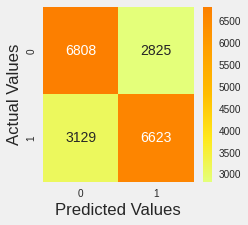

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", lg.score(x_train, y_train))
print("Testing Accuracy :", lg.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred_lg)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred_lg))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      9633
           1       0.70      0.68      0.69      9752

    accuracy                           0.69     19385
   macro avg       0.69      0.69      0.69     19385
weighted avg       0.69      0.69      0.69     19385



In [82]:
y_pred_lg = list(y_pred_lg)

In [83]:
y_valid_lg = []
for i in y_valid[0]:
  y_valid_lg.append(i)
y_valid_lg

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,


In [84]:
compare_lg = pd.DataFrame({'Actual Values': y_valid_lg, 'Predicted Values': y_pred_lg})

compare_lg

,Actual Values,Predicted Values
0,1,1
1,1,0
2,1,1
3,0,0
4,0,0
...,...,...
19380,1,0
19381,1,1
19382,0,0
19383,1,0


In [85]:
compare_lg[compare_lg['Actual Values'] != compare_lg['Predicted Values']]

,Actual Values,Predicted Values
1,1,0
10,0,1
13,1,0
15,0,1
16,0,1
...,...,...
19376,1,0
19377,0,1
19379,1,0
19380,1,0


## KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [87]:
y_pred_knn = knn.predict(x_valid)

In [88]:
y_pred_knn

array([1, 0, 1, ..., 1, 1, 1])

Training Accuracy : 0.9049252634158295
Testing Accuracy : 0.854681454733041


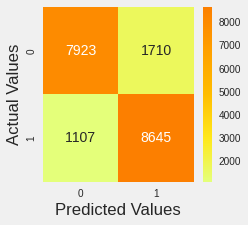

In [89]:
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred_knn)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      9633
           1       0.83      0.89      0.86      9752

    accuracy                           0.85     19385
   macro avg       0.86      0.85      0.85     19385
weighted avg       0.86      0.85      0.85     19385



In [91]:
y_pred_knn = list(y_pred_knn)

In [92]:
y_valid_knn = []
for i in y_valid[0]:
  y_valid_knn.append(i)
y_valid_knn

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,


In [93]:
compare_knn = pd.DataFrame({'Actual Values': y_valid_knn, 'Predicted Values': y_pred_knn})

compare_knn

,Actual Values,Predicted Values
0,1,1
1,1,0
2,1,1
3,0,0
4,0,0
...,...,...
19380,1,1
19381,1,0
19382,0,1
19383,1,1


In [94]:
compare_knn[compare_knn['Actual Values'] != compare_knn['Predicted Values']]

,Actual Values,Predicted Values
1,1,0
6,0,1
10,0,1
11,0,1
21,1,0
...,...,...
19365,0,1
19369,0,1
19378,0,1
19381,1,0


## Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [124]:
y_pred_rf = rf.predict(x_valid)

In [125]:
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

Training Accuracy : 0.9778305110976412
Testing Accuracy : 0.9287077637348465


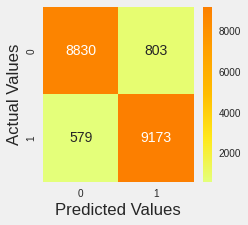

In [126]:
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [127]:
print(classification_report(y_valid, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9633
           1       0.92      0.94      0.93      9752

    accuracy                           0.93     19385
   macro avg       0.93      0.93      0.93     19385
weighted avg       0.93      0.93      0.93     19385



In [128]:
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [129]:
y_pred_rf = list(y_pred_rf)

In [130]:
y_valid_rf = []
for i in y_valid[0]:
  y_valid_rf.append(i)
y_valid_rf

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,


In [131]:
compare_rf = pd.DataFrame({'Actual Values': y_valid_rf, 'Predicted Values': y_pred_rf})

compare_rf

,Actual Values,Predicted Values
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
19380,1,1
19381,1,0
19382,0,1
19383,1,1


In [132]:
compare_rf[compare_rf['Actual Values'] != compare_rf['Predicted Values']]

,Actual Values,Predicted Values
10,0,1
58,0,1
70,1,0
87,1,0
91,1,0
...,...,...
19325,0,1
19326,0,1
19350,1,0
19381,1,0


In [133]:
x_train.shape, y_train.shape

((77539, 11), (77539, 1))

In [150]:
# extracting feature importances
importances = rf.feature_importances_

# creating a dataframe with feature names and their corresponding importances
feature_importances_df = pd.DataFrame({'feature': ['department', 'education', 'gender', 'no_of_trainings', 'age',
                                                   'previous_year_rating', 'length_of_service', 'awards_won?',
                                                   'avg_training_score','sum_metric', 'total_score'], 
                                       'importance': importances})

# sorting the dataframe by feature importances in descending order
feature_importances_df = feature_importances_df.sort_values(by=['importance'], ascending=False)


feature_importances_df

,feature,importance
9,sum_metric,0.196239
4,age,0.164526
5,previous_year_rating,0.155235
8,avg_training_score,0.139280
6,length_of_service,0.110493
10,total_score,0.105502
0,department,0.072127
2,gender,0.024985
1,education,0.016555
3,no_of_trainings,0.010799


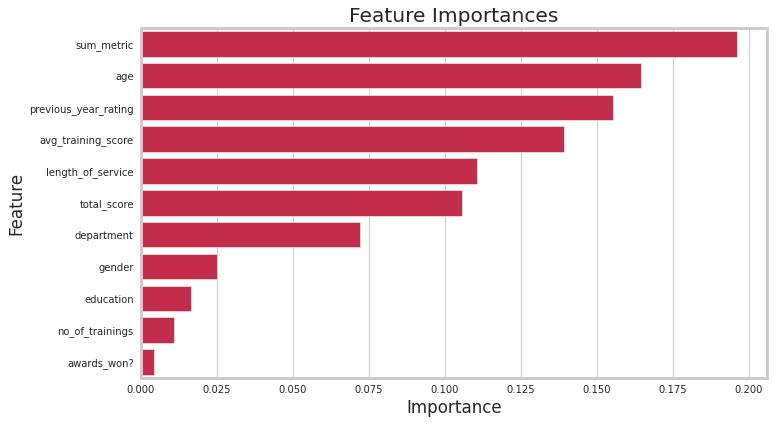

In [152]:
# creating a bar plot of feature importances
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='importance', y='feature', data=feature_importances_df, color='crimson')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Predicting on unknown data

Now we will perform Real Time Predictions using the Model which we have created.

So, lets get started, 
* First, we we will check the descriptive summary of the data again, so that we can analyze the columns and values which we can provide to the Model as Input and expect the Model to return Output whether the Employee should get a promotion or not.

* Then we will define the value for which we want the predction, and then finally we will predict the values.

In [106]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,52992.000000,52992.000000,52992.000000,52992.000000,52992.000000,52992.000000,52992.000000,52992.000000,52992.000000,52992.000000,52992.000000,52992.000000
mean,4.958296,2.249132,0.702823,1.255944,34.254321,3.304725,5.381869,0.023645,63.431273,0.085485,3.328370,80.021588
std,2.516290,0.466317,0.457019,0.611910,7.121299,1.214213,3.352458,0.151942,13.404240,0.279604,1.227811,44.125775
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000,1.000000,39.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000,3.000000,53.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000,3.000000,64.000000
75%,7.000000,3.000000,1.000000,1.000000,38.000000,4.000000,7.000000,0.000000,76.000000,0.000000,4.000000,84.000000
max,8.000000,3.000000,1.000000,10.000000,60.000000,5.000000,16.000000,1.000000,99.000000,1.000000,6.000000,710.000000


In [144]:
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'avg_training_score', 'is_promoted', 'sum_metric', 'total_score'],
      dtype='object')

In [107]:
new_data = np.array([(2, #department code
                      3, #masters degree
                      1, #male
                      1, #1 training
                      30, #30 years old
                      5, #previous year rating
                      10, #length of service
                      1, #awards won
                      95, #avg training score
                      7, #sum of metric 
                      700 #total score
                     )])
new_data = sc.transform(new_data)


In [108]:
final_prediction = rf.predict(new_data)
print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", final_prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]


## Predicting for our test data

In [109]:
test_data_final_prediction = rf.predict(x_test)
print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", test_data_final_prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [0 0 0 ... 0 0 1]


In [110]:
test_data_final_prediction = list(test_data_final_prediction)
test_data_final_prediction

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [111]:
len(test_data_final_prediction)

23490

In [112]:
len(x_test)

23490

In [113]:
test['is_promoted'] = test_data_final_prediction

In [114]:
test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,sum_metric,total_score,is_promoted
0,8,2,1,1,24,3.0,1,0,77,3.0,77,0
1,2,2,0,1,31,3.0,5,0,51,3.0,51,0
2,7,2,1,1,31,1.0,4,0,47,1.0,47,0
3,5,2,0,3,31,2.0,9,0,65,2.0,195,0
4,1,2,1,1,30,4.0,7,0,61,4.0,61,0


In [115]:
test[test['is_promoted']==1]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,sum_metric,total_score,is_promoted
9,8,2,1,1,29,5.0,2,0,76,5.0,76,1
20,7,3,1,1,37,5.0,3,0,47,5.0,47,1
40,0,2,1,1,26,5.0,4,0,90,5.0,90,1
42,4,2,1,1,34,5.0,5,0,66,5.0,66,1
44,8,2,0,1,52,5.0,18,0,80,5.0,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23441,5,2,1,1,36,5.0,6,0,69,5.0,69,1
23461,7,2,0,2,27,4.0,4,0,48,4.0,96,1
23470,7,2,1,1,36,5.0,3,0,49,5.0,49,1
23472,8,2,0,1,29,3.0,3,0,87,3.0,87,1


### There are 2495 people who will get promotion according to our model

In [116]:
import pickle

# Save the model to a file using pickle
with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [117]:
import pickle

# Save the standard scaler object to a file using pickle
with open('sc.pkl', 'wb') as file:
    pickle.dump(sc, file)